#introduction to machine learning
##pca analysis on MNIST dataset

داخل درس با آنالیز مولفه های اصلی آشنا شده اید ، در این تمرین قصد داریم از ابتدا این روش را روی دیتاست داده شده عملی کنیم و نتیایج این روش را با همدیگر مشاهده کنیم.

In [3]:
first_name= "Sana"
last_name= "Harighi"
student_number= "98104047"

در بخش زیر تمامی کتابخانه هایی که لازم دارید را ایمپورت کنید.

In [4]:
import numpy as np
import random
import pandas as pd
import cv2
import os
import matplotlib.pyplot as plt
from numpy.linalg import eigh
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

### داده شده را لود کنید MNIST در این قسمت دیتا ست  

پیش از این که مولفه های اصلی داده ها را استخراج کنید آن را نرمالایز کنید.
توجه کنید که سمپل های لود شده به صورت 28*28  میباشند و باید آن را به صورت بردار 784 تایی تبدیل کنید

In [5]:
#load the data set and fill nan value with 0
# TODO (load dataset)
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

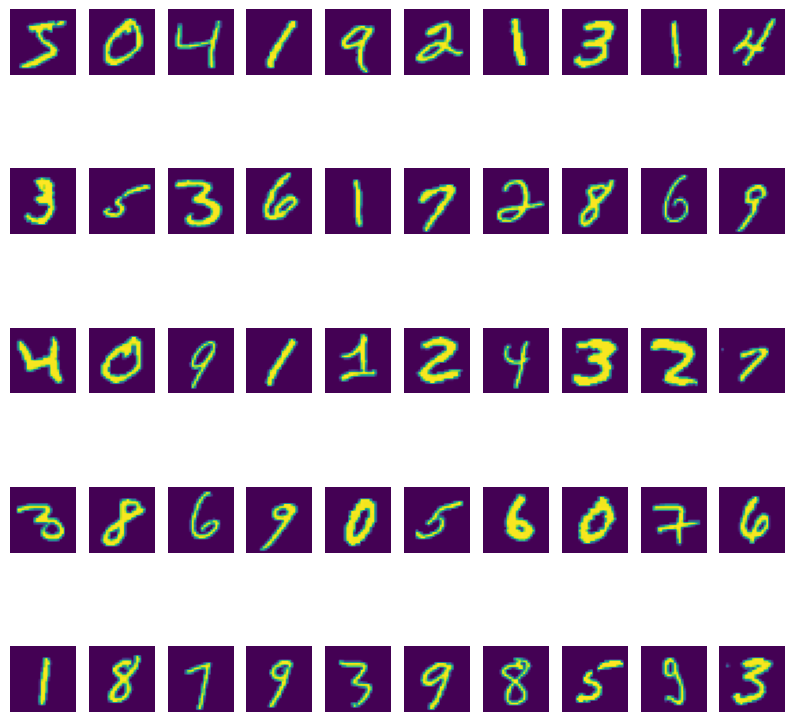

In [6]:
# here show 50 first of this images

def show_images(num_images,X):
    # TODO (implement show images function)
    #inputs dataset and number of images wants to show
    #output plot images
    fig = plt.figure(figsize=(10,10))
    for i in range(num_images):
      plt.subplot(int(num_images/10),10,i+1)
      plt.imshow(X[i])
      plt.axis("off")

show_images(50,x_train)

In [7]:
#TODO scale the data set to [0 1]
#divide data to maximum value .
x_train = x_train/255
x_test = x_test/255
x_train = np.reshape(x_train, (x_train.shape[0], 784))
x_test = np.reshape(x_test, (x_test.shape[0], 784))

در این قسمت ابتدا تابع کواریانس داده را بدست آورید و سپس مقادیر ویژه و بردار ویژه های آن را استخراج کنید.

In [8]:
#TODO calculate the covariance matrix and the eigenvalue and eigenvectors of the covariance matrix.
cov_matrix = np.cov(x_train.T)
egnvalues, egnvectors = eigh(cov_matrix)

در بخش زیر میخواهیم تعدادی از مولفه های اصلی را استخراج کنیم که بخش قابل قبولی از واریانس داده ها را شامل شده باشند.

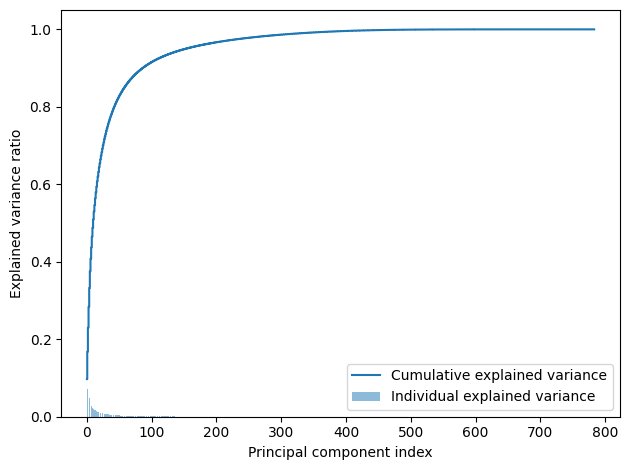

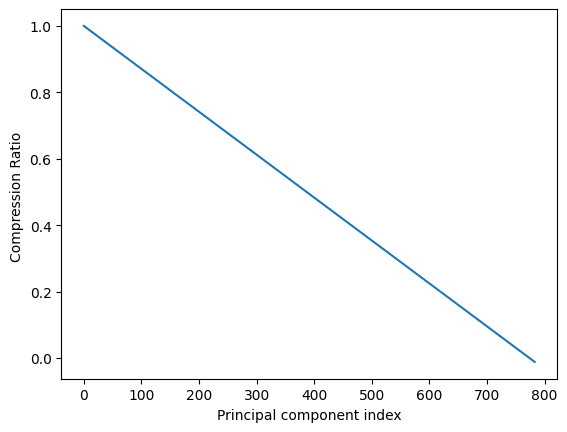

In [9]:
explained_variance = 0.7 # you can change this variable to get more component of datasets.
#calculate the total variance from eigenvalues and find the first k component that contains the eplained_variance of the total variance.
#TODO
total_egnvalues = sum(egnvalues)
var_exp = [(i/total_egnvalues) for i in sorted(egnvalues, reverse=True)]
cum_sum_exp = np.cumsum(var_exp)

plt.figure()
plt.bar(range(0,len(var_exp)), var_exp, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_exp)), cum_sum_exp, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()
#calculate the compression_ratio
full_size = x_train.shape[0]*x_train.shape[1]
plt.figure()
compression_ratio = [(full_size - i*(x_train.shape[0]+x_train.shape[1]))/full_size for i in range(0,len(cum_sum_exp))]
plt.plot(range(0,len(cum_sum_exp)), compression_ratio)
plt.ylabel('Compression Ratio ')
plt.xlabel('Principal component index')
plt.show()

In [10]:
eigen_pair = [(np.abs(egnvalues[i]), egnvectors[:,i]) for i in range(len(egnvalues))]
eigen_pair.sort(key=lambda x: x[0], reverse=True)

required_variance = explained_variance*total_egnvalues
required_comp = 0
variance = 0

for i in range(len(eigen_pair)):
    variance += eigen_pair[i][0]
    if variance >= required_variance:
        required_comp = i + 1
        break

print('Total Components: {}'.format(len(eigen_pair)))
print('Required Components: {}'.format(required_comp))

Total Components: 784
Required Components: 26


حال در این بخش دیتاهای موجود را روی این مولفه ها تصویر کنید عملیات کاهش بعدد را انجام دهید و سپس ابعاد را به اندازه تصاویر اصلی برگردانید و  تصویر یکی از سمپل ها را برای هر دو حالت قبل از کاهش بعد روی مولفه ها و بعد از آن رسم کنید.

Projection Matrix Shape: (784, 26)
Dimentionally of projected data: (60000, 26)
Dimentionally of reconstructed data: (60000, 784)


Text(0.5, 1.0, 'reduced component image')

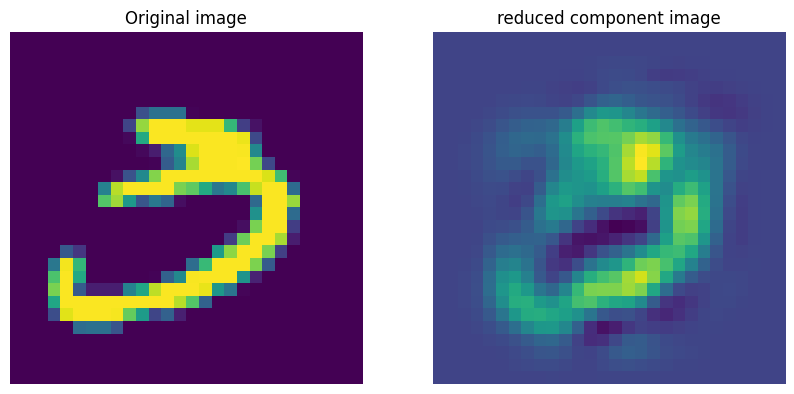

In [11]:
#Project Images into Reduced Dimensionality Eigenbasis F=X*V (X is our dataset,F our reduced dimensionality dataset,V is k choosen eigenvectors)
k = required_comp
projection_matrix = np.empty(shape=(x_train.shape[1], k))

for index in range(required_comp):
    eigenvector = eigen_pair[index][1]
    projection_matrix[:, index] = eigenvector

print('Projection Matrix Shape: {}'.format(projection_matrix.shape))

projected_x = x_train.dot(projection_matrix)

print('Dimentionally of projected data: {}'.format(projected_x.shape))

#And Reproject Images to Standard Basis for plotting the reduced component image X_k=F*V_transpose (V_transpose is equal to V inverse)
reconstructed_x = projected_x.dot(projection_matrix.T)

print('Dimentionally of reconstructed data: {}'.format(reconstructed_x.shape))

#select on sample and reshape it to a 28 by 28 matrix and plot them as image
index = random.randint(0,6000)
fig = plt.figure(figsize=(10,15))
plt.subplot(1,2,1)
plt.imshow(x_train[index].reshape(28,28))
plt.axis("off")
plt.title("Original image")

plt.subplot(1,2,2)
plt.imshow(reconstructed_x[index].reshape(28,28))
plt.axis("off")
plt.title("reduced component image")

#TODO
#plot the dimentionally reduced data
#plot the original data

## Perform PCA and Gauge Max Accuracy

حال میخواهیم برای دیتای تصویر شده یک مدل یادگیری بسازیم و دقت مدل را برحسب تعدا مولفه های اصلی بدست بیاوریم .

In [12]:
#complete below function using python PCA function

def do_pca(n_components, data):
  #input number of component and not normalized data set.
  #output is the projected dataset
  # TODO
  pca = PCA(n_components=n_components)
  compressed = pca.fit_transform(data)
  projected_data = pca.inverse_transform(compressed)

  return projected_data

In [13]:
x_train_comp = do_pca(k, x_train)

Text(0.5, 1.0, 'Reduced component image')

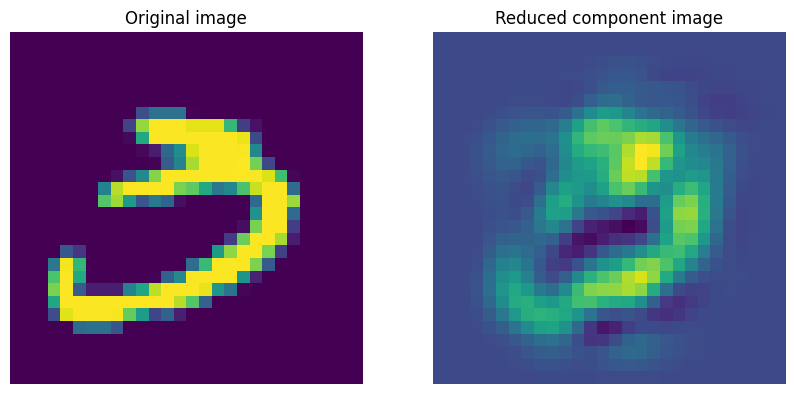

In [14]:
fig = plt.figure(figsize=(10,15))
plt.subplot(1,2,1)
plt.imshow(x_train[index].reshape(28,28))
plt.axis("off")
plt.title("Original image")

plt.subplot(1,2,2)
plt.imshow(x_train_comp[index].reshape(28,28))
plt.axis("off")
plt.title("Reduced component image")

In [15]:
#define a function that gets the X data and Y labels and returns the accuracy of ml model.
from sklearn.linear_model import LogisticRegression

def ML_model(X, y, n_components):
    #define ML model inputs dataset and lables
    #output accuracy of model on dataset
    # TODO
    X_comp = do_pca(n_components, X)
    X_train, X_test, y_train, y_test = train_test_split(X_comp, y, test_size=0.3, shuffle=True)
    clf = LogisticRegression(C=50.0 / 5000, penalty="l1", solver="saga", tol=0.1)
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)

    return score

In [26]:
#your code to plot the accuracy of projected train data on one ml model(choose on your own reggression , random forest , ...)
#consider number of component from 2 to 101 and calculate accuracy based on number of components
#TODO
acc_list, pc_list = [], []

for pc in range(2,105,10): #I set the step size equal to 10 because it lasts too long for the step size=1.
  acc = ML_model(x_train, y_train, pc)
  acc_list.append(acc)
  pc_list.append(pc)

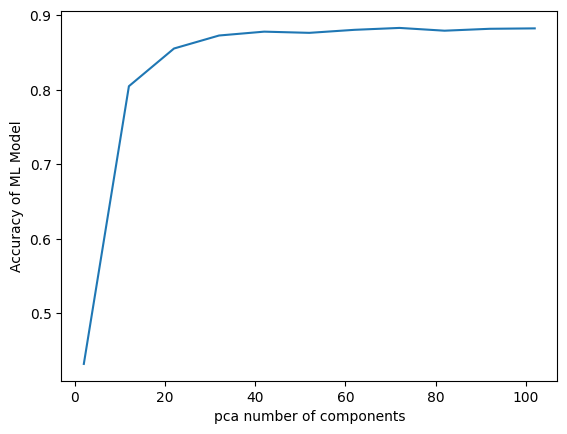

In [27]:
#plot the accuracy based on components.
#TODO
plt.figure()
plt.plot(pc_list, acc_list)
plt.ylabel("Accuracy of ML Model")
plt.xlabel("pca number of components")
plt.show()

In [33]:
#print the number of components that maximize the accuracy and the max accuracy
#TODO
print("the number of components that maximize the accuracy: ",pc_list[np.argmax(acc_list)])
print("the max accuracy: ",np.max(acc_list))

the number of components that maximize the accuracy:  72
the max accuracy:  0.8827222222222222
